In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_bb0n = []
y_bb0n = []
z_bb0n = []

x_gamma = []
y_gamma = []
z_gamma = []

x_bb0n.append([])
y_bb0n.append([])
z_bb0n.append([])

x_gamma.append([])
y_gamma.append([])
z_gamma.append([])

idx = 0
with open("/Users/Tiger/nexo_py/txt_OLD/gamma_x.txt") as f1, open("/Users/Tiger/nexo_py/txt_OLD/gamma_y.txt") as f2, open("/Users/Tiger/nexo_py/txt_OLD/gamma_z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            x_gamma[idx].append( float(line1[:len(line1)-1]) )
            y_gamma[idx].append( float(line2[:len(line1)-1]) )
            z_gamma[idx].append( float(line3[:len(line1)-1]) )
        else:
            idx+=1
            x_gamma.append([])
            y_gamma.append([])
            z_gamma.append([])
            
idx = 0
with open("/Users/Tiger/nexo_py/txt_OLD/bb0n_x.txt") as f1, open("/Users/Tiger/nexo_py/txt_OLD/bb0n_y.txt") as f2, open("/Users/Tiger/nexo_py/txt_OLD/bb0n_z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            x_bb0n[idx].append( float(line1[:len(line1)-1]) )
            y_bb0n[idx].append( float(line2[:len(line1)-1]) )
            z_bb0n[idx].append( float(line3[:len(line1)-1]) )
        else:
            idx+=1
            if(idx > len(x_gamma)):
                break
            x_bb0n.append([])
            y_bb0n.append([])
            z_bb0n.append([])

            
x_bb0n.pop()
y_bb0n.pop()
z_bb0n.pop()
x_gamma.pop()
y_gamma.pop()
z_gamma.pop()

[]

In [2]:
eng_bb0n=[]
eng_bb0n.append([])
eng_gamma=[]
eng_gamma.append([])
idx = 0
with open("/Users/Tiger/nexo_py/txt_OLD/gamma_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            eng_gamma[idx].append( float(line) )
        else:
            idx+=1
            eng_gamma.append([])
idx = 0
with open("/Users/Tiger/nexo_py/txt_OLD/bb0n_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            eng_bb0n[idx].append( float(line) )
        else:
            idx+=1
            if (idx > len(eng_gamma)):
                break
            eng_bb0n.append([])
            
eng_bb0n.pop()            
eng_gamma.pop()

[]

In [3]:
len(x_gamma)

16250

gamma
gamma
gamma
gamma
gamma
gamma
gamma
gamma
gamma
gamma
bb0n
bb0n
bb0n
bb0n
bb0n
bb0n
bb0n
bb0n
bb0n
bb0n


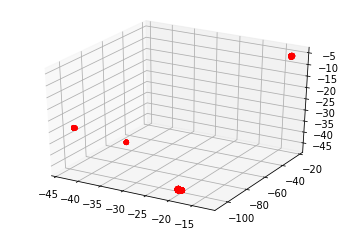

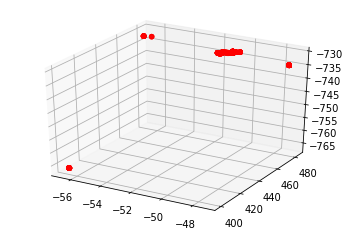

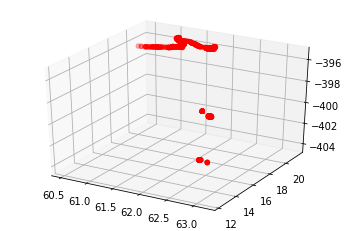

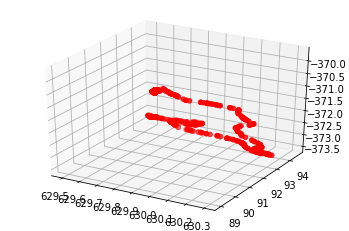

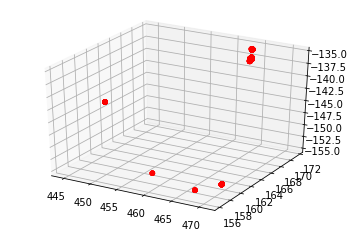

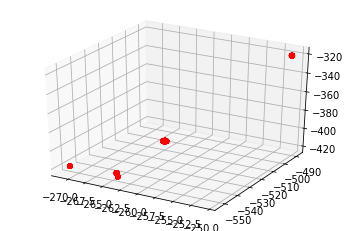

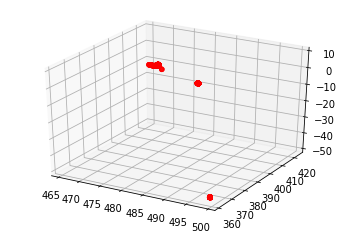

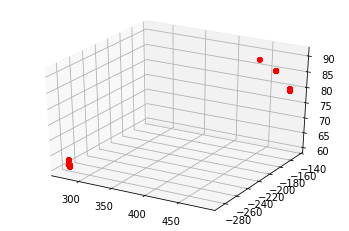

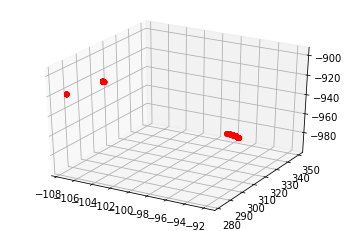

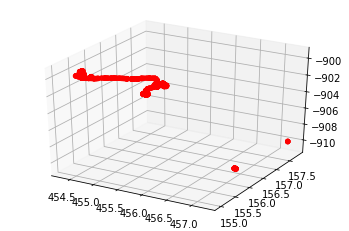

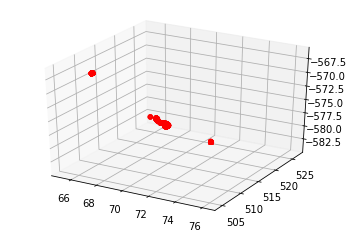

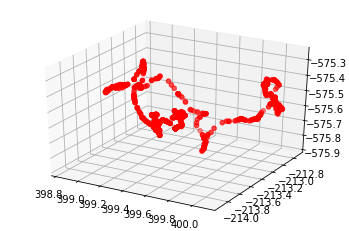

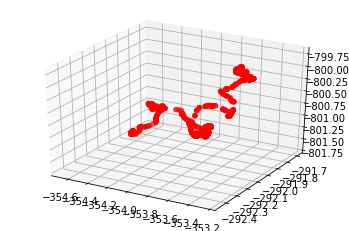

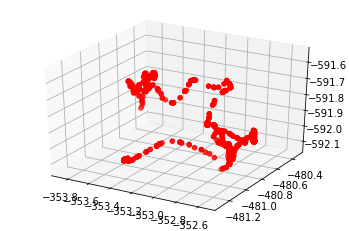

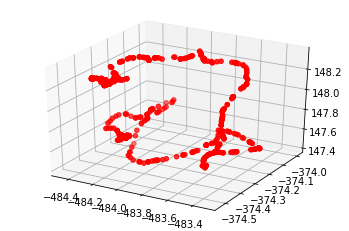

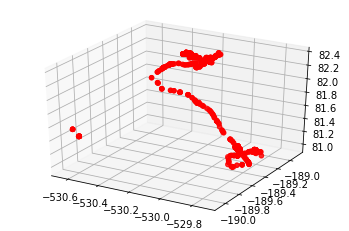

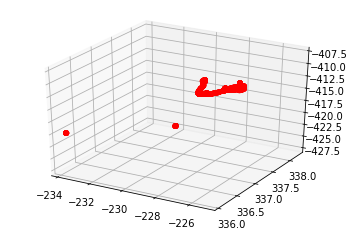

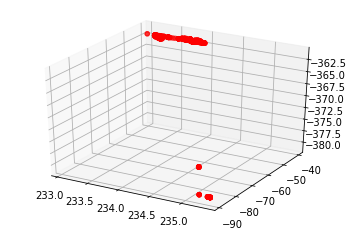

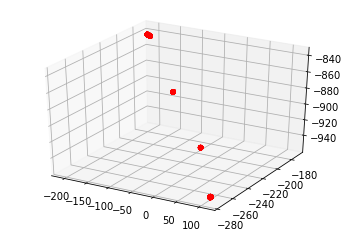

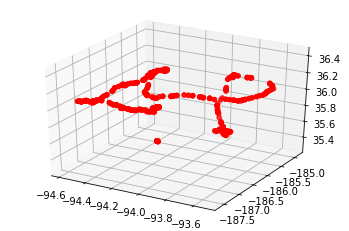

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
for i in range(0, 10):
    fig = plt.figure()
    print("gamma")
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_gamma[i], y_gamma[i], z_gamma[i], zdir='z', c= 'red')
for i in range(0, 10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    print("bb0n")
    ax.scatter(x_bb0n[i+10], y_bb0n[i+10], z_bb0n[i+10], zdir='z', c= 'red')

In [4]:
import math
bb0n_single_x = []
bb0n_single_y = []
bb0n_single_z = []
bb0n_single_E = []
bb0n_single_idx = []
bb0n_multi_x = []
bb0n_multi_y = []
bb0n_multi_z = []
bb0n_multi_E = []
bb0n_multi_idx = []
average_x = 0
average_y = 0
average_z = 0
count = 0
gamma_single_x = []
gamma_single_y = []
gamma_single_z = []
gamma_single_E = []
gamma_single_idx = []
gamma_multi_x = []
gamma_multi_y = []
gamma_multi_z = []
gamma_multi_E = []
gamma_multi_idx = []

cluster_count = 0
count = 0
for i in range(0, len(x_bb0n)):
    average_x = 0
    average_y = 0
    average_z = 0
    sum_x = 0
    sum_y = 0
    sum_z = 0
    for j in range (0, len(x_bb0n[i]) - 1): 
        sum_x += x_bb0n[i][j - count]
        sum_y += y_bb0n[i][j - count]
        sum_z += z_bb0n[i][j - count]
        average_x = sum_x/(j+1 - count)
        average_y = sum_y/(j+1 - count)
        average_z = sum_z/(j+1 - count)
        if (math.sqrt((abs(average_x - x_bb0n[i][j + 1])**2 + 
            abs(average_y - y_bb0n[i][j + 1])**2 + 
            abs(average_z - z_bb0n[i][j + 1])**2)) > 7 and j > 3):
            cluster_count += 1
            count = j
            sum_x = 0
            sum_y = 0
            sum_z = 0
    if (cluster_count == 0):
        bb0n_single_x.append(x_bb0n[i])
        bb0n_single_y.append(y_bb0n[i])
        bb0n_single_z.append(z_bb0n[i])
        bb0n_single_E.append(eng_bb0n[i])
        bb0n_single_idx.append(i)
    elif (cluster_count != 0):
        bb0n_multi_x.append(x_bb0n[i][0:count])
        bb0n_multi_y.append(y_bb0n[i][0:count])
        bb0n_multi_z.append(z_bb0n[i][0:count])
        bb0n_multi_E.append(eng_bb0n[i][0:count])
        bb0n_multi_idx.append(i)
    count = 0
    cluster_count = 0
print("seperate")   
for i in range(0, len(x_gamma)):
    average_x = 0
    average_y = 0
    average_z = 0
    sum_x = 0
    sum_y = 0
    sum_z = 0
    for j in range (0, len(x_gamma[i]) - 1):
        sum_x += x_gamma[i][j - count]
        sum_y += y_gamma[i][j - count]
        sum_z += z_gamma[i][j - count]
        average_x = sum_x/(j+1 - count)
        average_y = sum_y/(j+1 - count)
        average_z = sum_z/(j+1 - count)
        if (math.sqrt((abs(average_x - x_gamma[i][j + 1])**2 + 
            abs(average_y - y_gamma[i][j + 1])**2 + 
            abs(average_z - z_gamma[i][j + 1])**2)) > 7 and j > 3):
            cluster_count += 1
            count = j
            sum_x = 0
            sum_y = 0
            sum_z = 0
    if (cluster_count == 0):
        gamma_single_x.append(x_gamma[i])
        gamma_single_y.append(y_gamma[i])
        gamma_single_z.append(z_gamma[i])
        gamma_single_E.append(eng_gamma[i])
        gamma_single_idx.append(i)
    elif (cluster_count != 0):
        gamma_multi_x.append(x_gamma[i][0:count])
        gamma_multi_y.append(y_gamma[i][0:count])
        gamma_multi_z.append(z_gamma[i][0:count])
        gamma_multi_E.append(eng_gamma[i][0:count])
        gamma_multi_idx.append(i)
    cluster_count = 0
    count = 0
            
print(len(bb0n_single_x))
print(len(gamma_single_x))

print(len(bb0n_multi_x))
print(len(gamma_multi_x))
            
            

seperate
8539
1168
1461
15082


In [ ]:
import math
bb0n_single_x = []
bb0n_single_y = []
bb0n_single_z = []
bb0n_single_E = []
bb0n_single_idx = []
bb0n_multi_x = []
bb0n_multi_y = []
bb0n_multi_z = []
bb0n_multi_E = []
bb0n_multi_idx = []
average_x = 0
average_y = 0
average_z = 0
count = 0
gamma_single_x = []
gamma_single_y = []
gamma_single_z = []
gamma_single_E = []
gamma_single_idx = []
gamma_multi_x = []
gamma_multi_y = []
gamma_multi_z = []
gamma_multi_E = []
gamma_multi_idx = []

cluster_count = 0
count = 0
for i in range(0, len(x_bb0n)):
    sum_x = x_bb0n[i]
    sum_y = y_bb0n[i]
    sum_z = z_bb0n[i]
    average_x = sum_x/len(x_bb0n)
    average_y = sum_x/len(y_bb0n)
    average_z = sum_x/len(z_bb0n)
    for j in range (0, len(x_bb0n[i]) - 1): 
        sum_x += x_bb0n[i][j - count]
        sum_y += y_bb0n[i][j - count]
        sum_z += z_bb0n[i][j - count]
        average_x = sum_x/(j+1 - count)
        average_y = sum_y/(j+1 - count)
        average_z = sum_z/(j+1 - count)
        if (math.sqrt((abs(average_x - x_bb0n[i][j + 1])**2 + 
            abs(average_y - y_bb0n[i][j + 1])**2 + 
            abs(average_z - z_bb0n[i][j + 1])**2)) > 7 and j > 3):
            cluster_count += 1
            count = j
            sum_x = 0
            sum_y = 0
            sum_z = 0
    if (cluster_count == 0):
        bb0n_single_x.append(x_bb0n[i])
        bb0n_single_y.append(y_bb0n[i])
        bb0n_single_z.append(z_bb0n[i])
        bb0n_single_E.append(eng_bb0n[i])
        bb0n_single_idx.append(i)
    elif (cluster_count != 0):
        bb0n_multi_x.append(x_bb0n[i][0:count])
        bb0n_multi_y.append(y_bb0n[i][0:count])
        bb0n_multi_z.append(z_bb0n[i][0:count])
        bb0n_multi_E.append(eng_bb0n[i][0:count])
        bb0n_multi_idx.append(i)
    count = 0
    cluster_count = 0
print("seperate")   
for i in range(0, len(x_gamma)):
    average_x = 0
    average_y = 0
    average_z = 0
    sum_x = 0
    sum_y = 0
    sum_z = 0
    for j in range (0, len(x_gamma[i]) - 1):
        sum_x += x_gamma[i][j - count]
        sum_y += y_gamma[i][j - count]
        sum_z += z_gamma[i][j - count]
        average_x = sum_x/(j+1 - count)
        average_y = sum_y/(j+1 - count)
        average_z = sum_z/(j+1 - count)
        if (math.sqrt((abs(average_x - x_gamma[i][j + 1])**2 + 
            abs(average_y - y_gamma[i][j + 1])**2 + 
            abs(average_z - z_gamma[i][j + 1])**2)) > 7 and j > 3):
            cluster_count += 1
            count = j
            sum_x = 0
            sum_y = 0
            sum_z = 0
    if (cluster_count == 0):
        gamma_single_x.append(x_gamma[i])
        gamma_single_y.append(y_gamma[i])
        gamma_single_z.append(z_gamma[i])
        gamma_single_E.append(eng_gamma[i])
        gamma_single_idx.append(i)
    elif (cluster_count != 0):
        gamma_multi_x.append(x_gamma[i][0:count])
        gamma_multi_y.append(y_gamma[i][0:count])
        gamma_multi_z.append(z_gamma[i][0:count])
        gamma_multi_E.append(eng_gamma[i][0:count])
        gamma_multi_idx.append(i)
    cluster_count = 0
    count = 0
            
print(len(bb0n_single_x))
print(len(gamma_single_x))

print(len(bb0n_multi_x))
print(len(gamma_multi_x))
            
            

In [15]:
gamma_travel_distance = []
bb0n_travel_distance = []
temp = 0
for i in range(0, len(x_bb0n)):
    for j in range(0, len(bb0n_single_x[i]) - 1):
        temp += math.sqrt((abs(bb0n_single_x[i][j] - bb0n_single_x[i][j + 1])**2 + 
                           abs(bb0n_single_y[i][j] - bb0n_single_y[i][j + 1])**2 + 
                           abs(bb0n_single_z[i][j] - bb0n_single_z[i][j + 1])**2))
    bb0n_travel_distance.append(temp)
    temp = 0

temp = 0
               
for i in range(0, len(gamma_single_x)):
    for j in range(0, len(gamma_single_x[i]) - 1):
        temp += math.sqrt((abs(gamma_single_x[i][j] - gamma_single_x[i][j + 1])**2 + 
                           abs(gamma_single_y[i][j] - gamma_single_y[i][j + 1])**2 + 
                           abs(gamma_single_z[i][j] - gamma_single_z[i][j + 1])**2))
    gamma_travel_distance.append(temp)
    temp = 0
bb0n_travel_distance = bb0n_travel_distance[int(len(bb0n_travel_distance) - len(gamma_travel_distance)):]

In [16]:
print(len(bb0n_travel_distance))
print(min(bb0n_travel_distance))
print(len(gamma_travel_distance))
print(min(gamma_travel_distance))
print(np.average(bb0n_travel_distance))
print(np.average(gamma_travel_distance))
print(np.std(bb0n_travel_distance))
print(np.std(gamma_travel_distance))

1168
4.769157837231353
1168
9.530342148640882
18.87428278535977
29.508331076409235
9.098101420679784
11.905850423077544


In [10]:
center_bb0n = []
center_gamma = []
x_bb0n_center = []
y_bb0n_center = []
z_bb0n_center = []

x_gamma_center = []
y_gamma_center = []
z_gamma_center = []

for i in range(0, len(x_bb0n)):
    #bb0n center
    x_center = np.average(x_bb0n[i], weights = eng_bb0n[i])
    x_bb0n_center.append(x_center)
    y_center = np.average(y_bb0n[i], weights = eng_bb0n[i])
    y_bb0n_center.append(y_center)
    z_center = np.average(z_bb0n[i], weights = eng_bb0n[i])
    z_bb0n_center.append(z_center)
    center_bb0n.append([x_center,y_center,z_center])
for i in range(0, len(x_gamma)):    
    #gamma center
    x_center = np.average(x_gamma[i], weights = eng_gamma[i])
    x_gamma_center.append(x_center)
    y_center = np.average(y_gamma[i], weights = eng_gamma[i])
    y_gamma_center.append(y_center)
    z_center = np.average(z_gamma[i], weights = eng_gamma[i])
    z_gamma_center.append(z_center)
    center_gamma.append([x_center,y_center,z_center])

In [12]:
import math
x_bb0n_radius = []
y_bb0n_radius = []
z_bb0n_radius = []

x_bb0n_radius.append([])
y_bb0n_radius.append([])
z_bb0n_radius.append([])

x_gamma_radius = []
y_gamma_radius = []
z_gamma_radius = []

x_gamma_radius.append([])
y_gamma_radius.append([])
z_gamma_radius.append([])

bb0n_radius = []
gamma_radius = []

bb0n_radius.append([])
gamma_radius.append([])

for i in range(0, len(x_bb0n)):
    for j in range(0, len(x_bb0n[i])):
        #bb0n radius for each deposition relative to weighted center
        x_bb0n_radius[i].append((x_bb0n[i][j] - x_bb0n_center[i]))
        y_bb0n_radius[i].append((y_bb0n[i][j] - y_bb0n_center[i]))
        z_bb0n_radius[i].append((z_bb0n[i][j] - z_bb0n_center[i]))
        bb0n_radius[i].append(math.sqrt(x_bb0n_radius[i][j]**(2) + y_bb0n_radius[i][j]**(2) + z_bb0n_radius[i][j]**(2)))
        
    x_bb0n_radius.append([])
    y_bb0n_radius.append([])
    z_bb0n_radius.append([])
    bb0n_radius.append([])
    
for i in range(0, len(x_gamma)):
    for j in range(0, len(x_gamma[i])):
        #gamma radius for each deposition relative to weighted center
        x_gamma_radius[i].append((x_gamma[i][j] - x_gamma_center[i]))
        y_gamma_radius[i].append((y_gamma[i][j] - y_gamma_center[i]))
        z_gamma_radius[i].append((z_gamma[i][j] - z_gamma_center[i]))
        gamma_radius[i].append(math.sqrt(x_gamma_radius[i][j]**(2) + y_gamma_radius[i][j]**(2) + z_gamma_radius[i][j]**(2)))
    
    x_gamma_radius.append([])
    y_gamma_radius.append([])
    z_gamma_radius.append([])
    gamma_radius.append([])

x_bb0n_radius.pop()
y_bb0n_radius.pop()
z_bb0n_radius.pop()
x_gamma_radius.pop()
y_gamma_radius.pop()
z_gamma_radius.pop()
bb0n_radius.pop()
gamma_radius.pop()

[]

In [15]:
bb0n_average_radius = []
gamma_average_radius = []

for i in range (0,len(x_bb0n)):
    bb0n_average_radius.append(np.average(bb0n_radius[i], weights = eng_bb0n[i]))
for i in range (0,len(x_gamma)):
    gamma_average_radius.append(np.average(gamma_radius[i], weights = eng_gamma[i]))

In [17]:
count = 0
for i in range (0,len(x_gamma)):
    if (gamma_average_radius[i] < 1):
        count += 1
print (count)

507


In [18]:
print(max(gamma_average_radius))
max(max(gamma_average_radius),max(bb0n_average_radius))

317.8240895490123


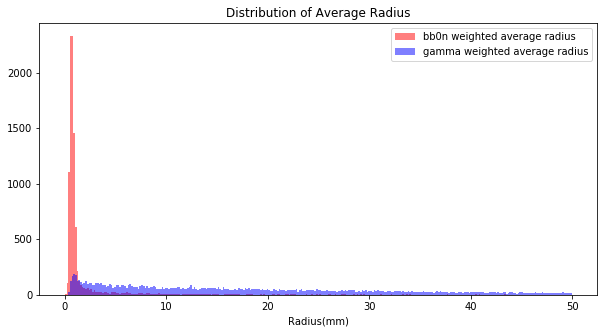

In [23]:
bins = np.linspace(0, 50, num=300)

plt.figure(figsize=(10,5))
plt.hist(bb0n_average_radius, bins, alpha=0.5, label='bb0n weighted average radius',color = 'red',lw = 1)
plt.hist(gamma_average_radius, bins, alpha=0.5, label='gamma weighted average radius', color = 'blue', lw = 1)
plt.legend(loc='upper right')
plt.xlabel('Radius(mm)')
plt.title('Distribution of Average Radius')
plt.savefig('Distribution of Average Radius.png')
plt.show()
#plt.savefig('Distribution of Average Radius.png')




In [ ]:
bins = np.linspace(0, max(max(gamma_travel_distance),max(bb0n_travel_distance)), num=300)

plt.figure(figsize=(10,5))
plt.hist(bb0n_travel_distance, bins, alpha=0.5, label='bb0n single-site travel_distance',color = 'red',lw = 1)
plt.hist(gamma_travel_distance, bins, alpha=0.5, label='gamma single_site travel_distance', color = 'blue', lw = 1)
plt.legend(loc='upper right')
plt.xlabel('distance(mm)')
plt.title('Distribution of Average Radius')
plt.savefig('Distribution of Average Radius.png')
plt.show()
#plt.savefig('Distribution of Average Radius.png')




In [24]:
count = 0;

r = 0.5
num_bucket = 100
temp = 0
bucket = 1/num_bucket
t_p = []
f_p = []
file1 = open("f_p.txt","a")
file2 = open("t_p.txt","a")
while(r <= 1):
    r += bucket
    tot1=0
    tot2=0
    tot3 =0
    tot4 =0
    for j in range(0, len(gamma_average_radius)):
        if (gamma_average_radius[j] < r):
            tot1 += 1
        if (bb0n_average_radius[j] < r):
            tot2 += 1
    if ((tot1 + tot2) != 0 and (len(gamma_average_radius) - tot1 + len(gamma_average_radius) - tot2) != 0):
        percentage1 = tot2/(tot1+tot2)
        print("left_side bb0n correct percentage: " + str(percentage1))
        percentage2 = (len(gamma_average_radius) - tot1)/(len(gamma_average_radius) - tot1 + len(gamma_average_radius) - tot2)
        print("right_side gamma correct percentage: " + str(percentage2))
        print("r: " + str(r))
        print()
        
    t_p.append((len(gamma_average_radius) - tot1)/len(gamma_average_radius))
    f_p.append((len(bb0n_average_radius) - tot2)/len(bb0n_average_radius))
    
    file1.write(str((len(bb0n_average_radius) - tot2)/len(bb0n_average_radius)) + '\n') 
    file2.write(str((len(gamma_average_radius) - tot1)/len(gamma_average_radius)) + '\n') 
        
file2.close()
file1.close()

IndexError: list index out of range

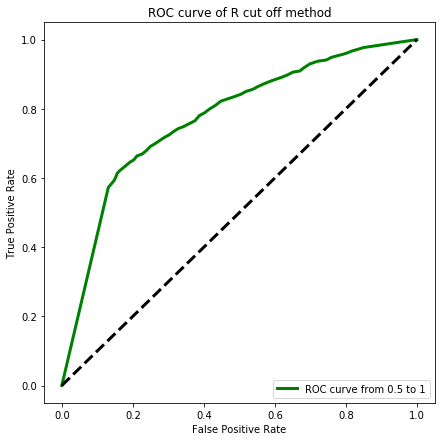

In [27]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
f_p.append(0)
t_p.append(0)

f_p.append(1)
t_p.append(1)
f_p.sort()
t_p.sort()

plt.plot(f_p, t_p, color='green',lw=3, label='ROC curve from 0.5 to 1')
plt.legend(loc='lower right')
plt.title('ROC curve of R cut off method')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')
plt.savefig('ROC_R_cutoff.png')
plt.show()

[  0.           6.48620591  12.97241182  19.45861773  25.94482364
  32.43102955  38.91723545  45.40344136  51.88964727  58.37585318
  64.86205909  71.348265    77.83447091  84.32067682  90.80688273
  97.29308864 103.77929455 110.26550046 116.75170636 123.23791227
 129.72411818 136.21032409 142.69653    149.18273591 155.66894182
 162.15514773 168.64135364 175.12755955 181.61376546 188.09997137
 194.58617727 201.07238318 207.55858909 214.044795   220.53100091
 227.01720682 233.50341273 239.98961864 246.47582455 252.96203046
 259.44823637 265.93444228 272.42064818 278.90685409 285.39306
 291.87926591 298.36547182 304.85167773 311.33788364 317.82408955]


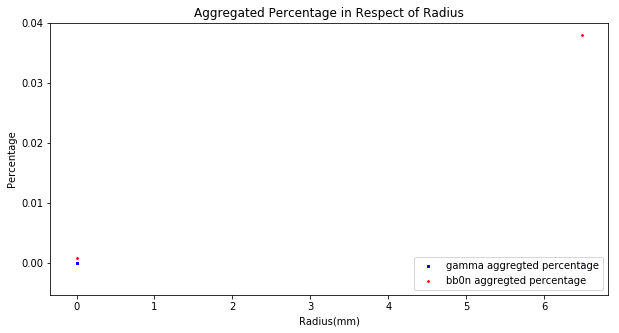

In [56]:
from scipy.interpolate import interp1d
num_bucket =50
x = np.linspace(0,max(max(gamma_average_radius),max(bb0n_average_radius)), num_bucket)
print(x)
count = 0;
y = []
z = []

r = 0
bucket = max(max(gamma_average_radius),max(bb0n_average_radius))/num_bucket

for i in range(0, num_bucket):
    tot1 = 0
    tot2 = 0
    r += bucket
    for j in range(0, len(gamma_average_radius)):
        if (gamma_average_radius[j] < r):
            tot1 += 1
    percentage = tot1/len(gamma_average_radius)
    y.append(percentage)
    for j in range(0, len(bb0n_average_radius)):
        if (bb0n_average_radius[j] < r):
            tot2 += 1
    percentage = tot2/len(bb0n_average_radius)
    z.append(percentage)

    
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
x[x>10] = np.nan
ax1.scatter(x, y, s=3, c='blue', marker="s", label='gamma aggregted percentage')
ax1.scatter(x, z, s=3, c='red', marker="o", label='bb0n aggregted percentage')
x_new = np.linspace(x.min(), x.max(),50)
f = interp1d(x, y, kind='quadratic')
h = interp1d(x, z, kind='quadratic')
y_smooth=f(x_new)
z_smooth=h(x_new)
ax1.plot(x_new, y_smooth, c='blue')
ax1.plot(x_new, z_smooth, c='red')
plt.legend(loc='lower right')
plt.xlabel('Radius(mm)')
plt.ylabel('Percentage')
plt.title('Aggregated Percentage in Respect of Radius')
#plt.savefig('Aggregated Percentage in Respect of Radius.png')
plt.show()

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


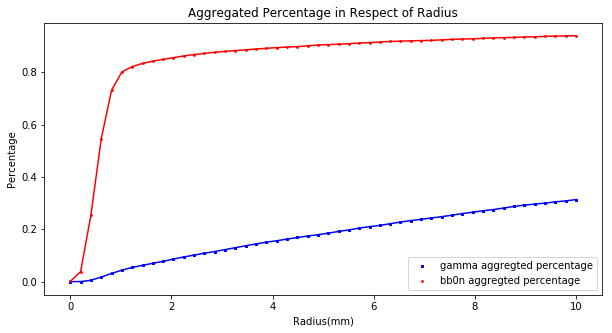

In [60]:
from scipy.interpolate import interp1d
gamma_ar_10 = []
bb0n_ar_10 = []

for i in range(0, len(gamma_average_radius)):
    if (gamma_average_radius[i] <= 10):
        gamma_ar_10.append(gamma_average_radius[i])
for i in range(0, len(bb0n_average_radius)):
    if (bb0n_average_radius[i] <= 10):
        bb0n_ar_10.append(bb0n_average_radius[i])

num_bucket =50
x = np.linspace(0,10, num_bucket)
print(x)
count = 0;
y = []
z = []

r = 0

bucket = 10/num_bucket


        
for i in range(0, num_bucket):
    tot1 = 0
    tot2 = 0
    r += bucket
    for j in range(0, len(gamma_ar_10)):
        if (gamma_ar_10[j] < r):
            tot1 += 1
    percentage = tot1/len(gamma_average_radius)
    y.append(percentage)
    for j in range(0, len(bb0n_ar_10)):
        if (bb0n_ar_10[j] < r):
            tot2 += 1
    percentage = tot2/len(bb0n_average_radius)
    z.append(percentage)

    
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
x[x>10] = np.nan
ax1.scatter(x, y, s=3, c='blue', marker="s", label='gamma aggregted percentage')
ax1.scatter(x, z, s=3, c='red', marker="o", label='bb0n aggregted percentage')
x_new = np.linspace(x.min(), x.max(),50)
f = interp1d(x, y, kind='quadratic')
h = interp1d(x, z, kind='quadratic')
y_smooth=f(x_new)
z_smooth=h(x_new)
ax1.plot(x_new, y_smooth, c='blue')
ax1.plot(x_new, z_smooth, c='red')
plt.legend(loc='lower right')
plt.xlabel('Radius(mm)')
plt.ylabel('Percentage')
plt.title('Aggregated Percentage in Respect of Radius')
#plt.savefig('Aggregated Percentage in Respect of Radius.png')
plt.show()

In [57]:
bb0n_average_radius_uw = []
gamma_average_radius_uw = []
for i in range (0,len(eng_bb0n)):
    bb0n_average_radius_uw.append(np.average(bb0n_radius[i]))
    gamma_average_radius_uw.append(np.average(gamma_radius[i]))

In [ ]:
bins = np.linspace(0, 50, num=1000)

plt.figure(figsize=(20,5))
plt.hist(bb0n_average_radius_uw, bins, alpha=0.5, label='bb0n unweighted average radius',color = 'red',lw = 1)
plt.hist(gamma_average_radius_uw, bins, alpha=0.5, label='gamma unweighted average radius', color = 'blue', lw = 1)
plt.legend(loc='upper right')
plt.show()

In [ ]:
print(max(bb0n_average_radius))
print(max(gamma_average_radius))

max_radius = max(max(bb0n_average_radius),max(gamma_average_radius))
min_radius = min(min(bb0n_average_radius),min(gamma_average_radius))

bb0n_relative_average_radius = []
gamma_relative_average_radius = []

for i in range (0,len(bb0n_average_radius)):
    bb0n_relative_average_radius.append(bb0n_average_radius[i]/(max_radius - min_radius))
    gamma_relative_average_radius.append(gamma_average_radius[i]/(max_radius - min_radius))

In [ ]:
bins = np.linspace(0, 1, num=300)

plt.figure(figsize=(20,5))
plt.hist(bb0n_relative_average_radius, bins, alpha=0.5, label='bb0n weighted relative average radius',color = 'red')
plt.hist(gamma_relative_average_radius, bins, alpha=0.5, label='gamma weighted relative average radius', color = 'blue')
plt.legend(loc='upper right')
plt.show()